In questa esperienza quello che abbiamo fatto è studiare il circuito CR(filtro passa alto) e il circuito RC(passa basso), studiandone in particolare
l'ampiezza e lo sfasamento rispetto al valore di v0 in entrata generato dal generatore d'onde, per stimare la frequenza di taglio e vedere che essa
sia consistente col valore teorico.

Per i filtri RC e RL È noto che la frequenza di taglio è data da: 1/(2piRC), nel caso considerato (approx 10.33 kHz)

![image](screen1.png)
![image](screen2.png)

Intersezioni trovate: [1.0759520891125305, 1.0807943612278816, 1.085636633343233, 1.0904789054585844]
Differenze nelle intersezioni: [0.005934878118928677, 0.001609802977530106, 0.002691427851731154, 0.006968745241010099]


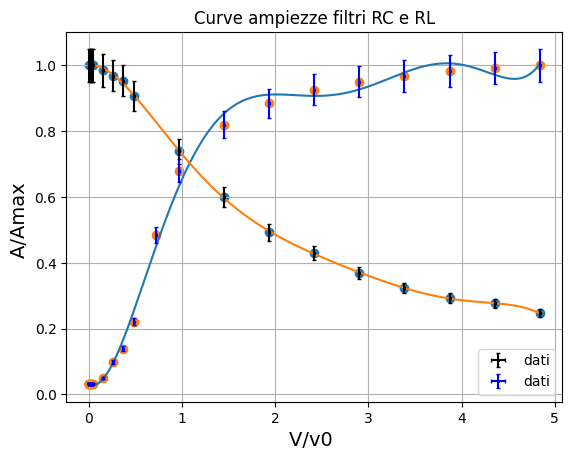

In [6]:
import Tiamat as tiam
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit                                        
ampl4 = np.array([1.60, 1.60, 1.60, 1.60, 1.60, 1.60, 1.60, 1.60, 1.60, 2.40, 4.80, 6.80, 10.8, 23.6, 33.2, 40.0, 43.2, 45.2, 46.4, 47.2, 48.0, 48.4, 48.8])/48.8#Volt, c.r.
freq4 = np.array([10.0, 20.0, 30.0, 40.0, 50.0, 160.0, 270.0, 380.0, 500.0, 1600.0, 2700.0, 3800.0, 5000.0, 7500.0, 10000.0, 15000.0, 20000.0, 25000.0, 30000.0, 35000.0, 40000.0, 45000.0,50000.0])/10334
ampl3 = np.array([52.0, 52.0, 52.0, 52.0, 52.0, 51.2, 50.4, 49.6, 47.2, 38.4, 31.2, 25.6, 22.4, 19.2, 16.8, 15.2, 14.4, 12.8])/52 #r.c.
freq3 = np.array([50.0, 160.0, 270.0, 380.0, 500.0, 1600.0, 2700.0, 3800.0, 5000.0, 10000.0, 15000.0, 20000.0, 25000.0, 30000.0, 35000.0, 40000.0, 45000.0, 50000.0])/10334
valori1, differenze1 = tiam.find_roots(freq4, ampl4, freq3, ampl3, np.min(freq4), np.max(freq4),precision=0.01)
print("Intersezioni trovate:", valori1)
print("Differenze nelle intersezioni:", differenze1)

plt.errorbar(freq3,ampl3 , xerr=0, yerr=(ampl3)/20, fmt='*', markersize=2, capsize=1.5, c='k', label='dati')
plt.errorbar(freq4,ampl4 , xerr=0, yerr=(ampl4)/20, fmt='*', markersize=2, capsize=1.5, c='b', label='dati')
plt.legend()
plt.ylabel(r'A/Amax ', size=14)
plt.xlabel(r'V/v0 ', size=14)
plt.title(r'Curve ampiezze filtri RC e RL')
plt.grid()
plt.scatter(freq3,ampl3)
plt.scatter(freq4,ampl4)
plt.show()

[12312.312312312313] [0.0006313689568056002]
[10610.61061061061] [0.00016164303448440442]


/tmp/ipykernel_5781/3344991857.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


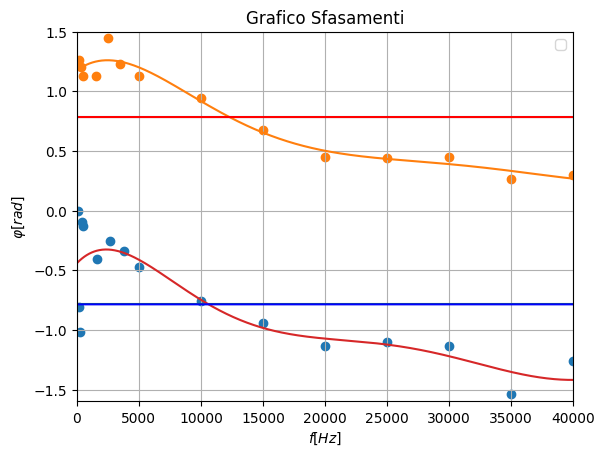

In [7]:
#Misuriamo v ai capi del condensatore
#Misuriamo v ai capi del condensatore
freq3 = np.array([50.0, 160.0, 270.0, 380.0, 500.0, 1600.0, 2700.0, 3800.0, 5000.0, 10000.0, 15000.0, 20000.0, 25000.0, 30000.0, 35000.0, 40000.0, 45000.0, 50000.0])
sfas3 = np.array([0, 0.08, 0.06, 0.004, 0.004, 0.004, 0.0015, 0.0014, 0.0015, 0.0012, 0.0010, 0.0009, 0.0007, 0.0006, 0.0007, 0.0005, 0.0005, 0.0004])*(-2*np.pi*freq3)/(10**2)
sfas3vero = np.array([0, 0.2, 0.2, 0.1, 0.004, 0])
FrqSfas3 = np.array([50.0, 60.0, 70.0, 80.0, 90.0, 100.0])
#Caduta di potenziale ai capi della resistenza
freq4 = np.array([10.0, 20.0, 30.0, 40.0, 50.0, 160.0, 270.0, 380.0, 500.0, 1600.0, 2700.0, 3800.0, 5000.0, 7500.0, 10000.0, 15000.0, 20000.0, 25000.0, 30000.0, 35000.0, 40000.0, 45000.0,50000.0])#KHz
FrqSfas4 = np.array([180.0, 370, 500.0, 1500.0, 2500.0, 3500.0, 5000.0, 10000.0, 15000.0, 20000.0, 25000.0, 30000.0, 35000.0, 40000.0, 45000.0, 50000.0])
sfas4 = np.array([1.12, 0.52, 0.36, 0.12, 0.092, 0.056, 0.036, 0.015, 0.0072, 0.0036, 0.0028, 0.0024, 0.0012, 0.0012, 0.0008, 0.0008])*(2*np.pi*FrqSfas4)/10**3

rettax1=np.linspace(0, 50000.0,10000)
rettay1=np.ones(10000)*(np.pi)/4
rettax2=np.linspace(0, 50000.0,10000)
rettay2=np.ones(10000)*(-np.pi)/4
valori1,differenze1=tiam.find_roots(rettax1,rettay1,FrqSfas4,sfas4,0,50000,precision=0.001)
print(valori1,differenze1)
valori2,differenze2=tiam.find_roots(rettax2,rettay2,freq3,sfas3,0,50000,precision=0.001)
print(valori2,differenze2)

plt.title('Grafico Sfasamenti')
plt.xlabel(r'$f [Hz]$')
plt.ylabel(r'$φ [rad]$')

plt.grid()
plt.scatter(freq3,sfas3)
plt.scatter(FrqSfas4,sfas4)
plt.plot(rettax1,rettay1,color="red")
plt.plot(rettax2,rettay2,color="blue")
plt.legend()
ax = plt.gca()
ax.set_ylim([-1.6, 1.5])
ax.set_xlim([0, 40000])
plt.show()



Slope: -0.0016000000000000005, Intercept: 54.93333333333334
Matrice di covarianza:
[[ 8.53333333e-09 -2.84444444e-05]
 [-2.84444444e-05  9.95555556e-01]]
Slope: 0.0020685714285714287, Intercept: 9.857142857142861
Matrice di covarianza:
[[ 3.76555102e-07 -1.35978231e-03]
 [-1.35978231e-03  4.78538776e+01]]


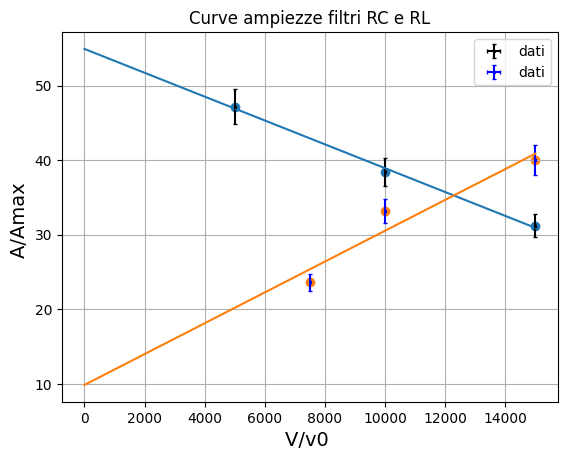

In [8]:
ampl_fit = np.array([47.2, 38.4, 31.2]) 
freq_fit = np.array([5000.0, 10000.0, 15000.0])
ampl_2fit = np.array([23.6, 33.2, 40.0]) 
freq_2fit = np.array([7500.0, 10000.0, 15000.0])


#facciamo il fit dei 2 set di dati
slope1,intercept1,cov_matrix1=tiam.fit_lineare(freq_fit,ampl_fit)
slope2,intercept2,cov_matrix2=tiam.fit_lineare(freq_2fit,ampl_2fit)
xfit=np.linspace(0,15000,10000)
x2fit=np.linspace(0,15000,10000)
plt.errorbar(freq_fit,ampl_fit , xerr=0, yerr=(ampl_fit)/20, fmt='*', markersize=2, capsize=1.5, c='k', label='dati')
plt.errorbar(freq_2fit,ampl_2fit , xerr=0, yerr=(ampl_2fit)/20, fmt='*', markersize=2, capsize=1.5, c='b', label='dati')
plt.legend()
plt.ylabel(r'A/Amax ', size=14)
plt.xlabel(r'V/v0 ', size=14)
plt.title(r'Curve ampiezze filtri RC e RL')
plt.grid()
plt.scatter(freq_fit,ampl_fit)
plt.scatter(freq_2fit,ampl_2fit)
plt.plot(xfit,slope1*xfit+intercept1)
plt.plot(x2fit,slope2*x2fit+intercept2)
plt.show()

In [9]:
#verifica consistenza (v0 teorico=10334)
#consistenza tra v0 intersezione e teorico

In [10]:
import importlib
import Tiamat# La libreria che vuoi ricaricare

# Ricarica la libreria
importlib.reload(Tiamat)
import Tiamat as tiam
v_sper=11269
v_teo=10334
err_sper=112
R=1/(2*np.pi*10000*2.2*10**(-9))
C=2.2*10**(-9)
err_teo=51
print(tiam.consistenza_statistica(v_sper,v_teo,err_sper,err_teo))

(False, 1.509903313490213e-14)
